#### Boilerplate

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [491]:
base_dir = 'data/'

files = os.listdir(base_dir)
files.sort()

data_list = []
for fname in files:
    if fname[-5:] != '.json':
        continue

    with open(os.path.join(base_dir, fname), 'r') as f:
        data = json.loads(f.read())

    if not data['num_useful_sessions'] > 0:
        continue
    
    data_list.append(data)

#### Draft-or-published

55 useful datasets
18 drafts
37 published


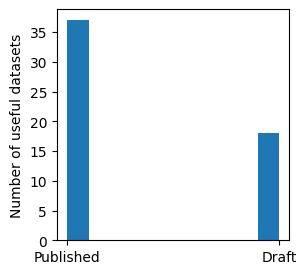

In [60]:
draft = []
draft_num = 0
for data in data_list:
    if data['version'] == 'None':
        draft_num += 1
        d = "Draft"
    else:
        d = "Published"
    draft.append(d)

fig, ax = plt.subplots(figsize=(3, 3))
ax.hist(draft)
ax.set_ylabel("Number of useful datasets")

print(f"{len(data_list)} useful datasets")
print(f"{draft_num} drafts")
print(f"{len(data_list) - draft_num} published")

#### Number of subjects

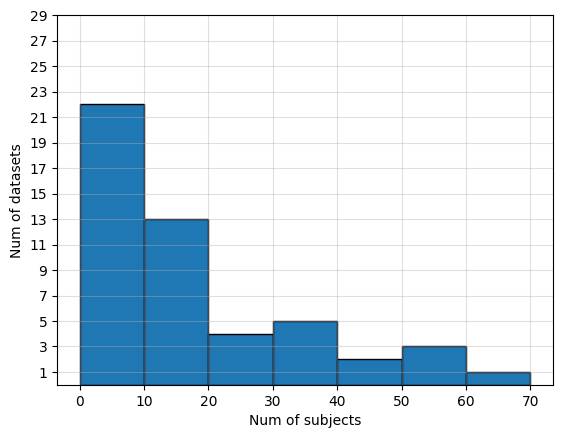

In [485]:
num_subjects = [x['num_subjects'] for x in data_list]

bins = list(range(0, 80, 10))
plt.hist(num_subjects, bins=bins, edgecolor='black')
plt.xlabel("Num of subjects")
plt.ylabel("Num of datasets")
plt.xticks(bins)
plt.yticks(range(1, 30, 2))
plt.grid(alpha=0.4)

Text(0.5, 0, 'Number of subjects')

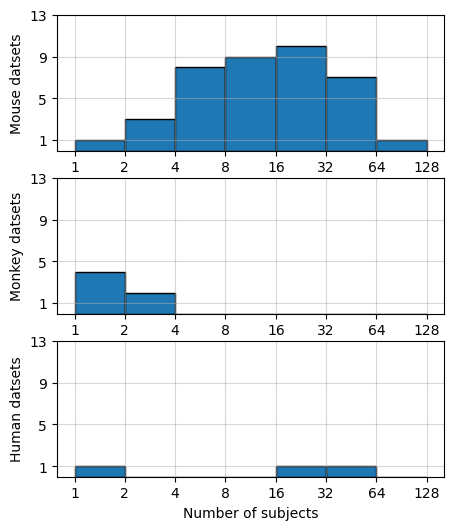

In [533]:
fig, ax = plt.subplots(len(subject_types), figsize=(5, 2.0*len(subject_types)))

for i, sub in enumerate(subject_types):
    
    num_subjects = []
    for j in range(len(data_list)):
        if sub == subjects[j]:
            num_subjects.append(data_list[j]['num_subjects'])
                
    bins = np.logspace(0, 7, num=8, base=2)

    ax[i].hist(num_subjects, bins=bins, edgecolor='black')
    ax[i].set_ylabel(f"{sub} datsets")
    ax[i].set_yticks(range(1, 15, 4))

    ax[i].set_xscale("log", base=2)
    ax[i].set_xticks(bins)
    ax[i].xaxis.set_major_formatter(ticker.ScalarFormatter())

    ax[i].grid(alpha=0.5)
    
ax[-1].set_xlabel("Number of subjects")

#### Subject Species

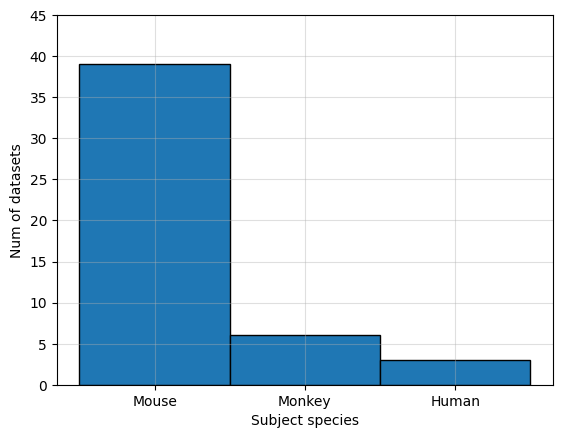

In [532]:
with open('data/subject.txt', 'r') as f:
    subjects = [x.strip() for x in f.readlines()]

subject_types = list(set(subjects))
subject_types = ['Mouse', 'Monkey', 'Human']

subject_idx = [subject_types.index(x) for x in subjects]


plt.hist(subject_idx, bins=np.arange(-0.5, len(subject_types) + 0.5, 1.0), edgecolor='black')
plt.xticks(range(0, len(subject_types), 1), subject_types)

plt.xlabel("Subject species")
plt.ylabel("Num of datasets")
plt.yticks(range(0, 50, 5))
plt.grid(alpha=0.4)


#### Session time

Text(0.5, 0, 'Total duration (hours)')

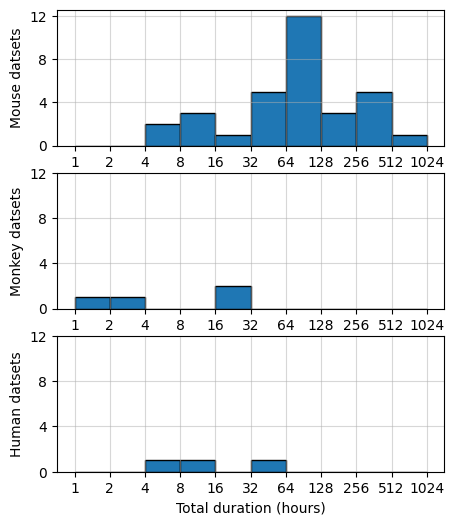

In [516]:
fig, ax = plt.subplots(len(subject_types), figsize=(5, 2.0*len(subject_types)))

for i, sub in enumerate(subject_types):
    
    session_time = []
    for j in range(len(data_list)):
        if sub == subjects[j]:
            session_time.append(data_list[j]['total_duration'])
            
    session_time = [x / 3600. for x in session_time if x != 0.0]
    
    bins = np.logspace(0, 10, num=11, base=2)

    ax[i].hist(session_time, bins=bins, edgecolor='black')
    ax[i].set_ylabel(f"{sub} datsets")
    ax[i].set_yticks(range(0, 13, 4))

    ax[i].set_xscale("log", base=2)
    ax[i].set_xticks(bins)
    ax[i].xaxis.set_major_formatter(ticker.ScalarFormatter())

    ax[i].grid(alpha=0.5)
    
ax[-1].tick_params(labelbottom=True)
ax[-1].set_xlabel("Total duration (hours)")

#### Trial time
Note: Not all datasets have valid trial-times

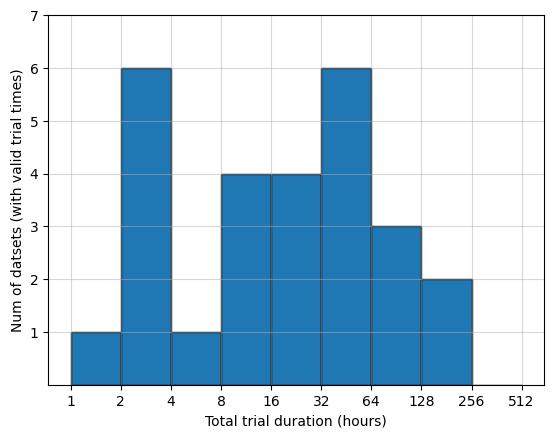

In [392]:
import matplotlib.ticker as ticker

trial_time = [x['total_trial_duration'] for x in data_list]
trial_time = [x / 3600. for x in trial_time]
trial_time = [x for x in trial_time if x != 0.0]
trial_time = [x for x in trial_time if not np.isnan(x)]

fig, ax = plt.subplots()
bins = np.logspace(0, 9, num=10, base=2)
plt.hist(trial_time, bins=bins, edgecolor='black')
plt.ylabel("Num of datsets (with valid trial times)")
plt.xlabel("Total trial duration (hours)")
plt.yticks(range(1, 8, 1))
plt.xscale("log", base=2)
plt.xticks(bins)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.ticklabel_format(axis='x', style='plain')
plt.grid(alpha=0.5)

#### Number of Units

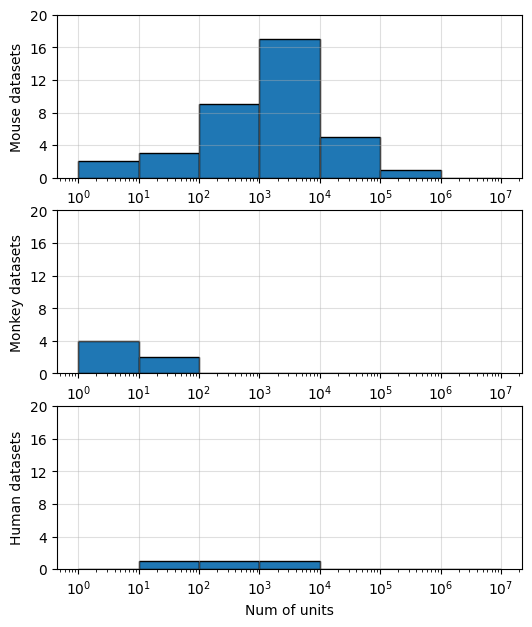

In [522]:
fig, ax = plt.subplots(len(subject_types), figsize=(6, 2.4*len(subject_types)))

for i, sub in enumerate(subject_types):
    
    units = []
    for j in range(len(data_list)):
        if sub == subjects[j]:
            units.append(sum(data_list[j]['units']['session_list']))
    
    #units = [sum(x['units']['session_list']) for x in data_list]

    bins = np.logspace(0, 7, num=8)
    ax[i].hist(units, bins=list(bins), edgecolor='black')
    ax[i].set_xscale('log')
    ax[i].set_xlabel("Num of units")
    ax[i].set_ylabel(f"{sub} datasets")
    ax[i].set_yticks(range(0, 22, 4))
    ax[i].grid(alpha=0.4)

#### Number of Spikes

Text(0.5, 0, 'Num of spikes')

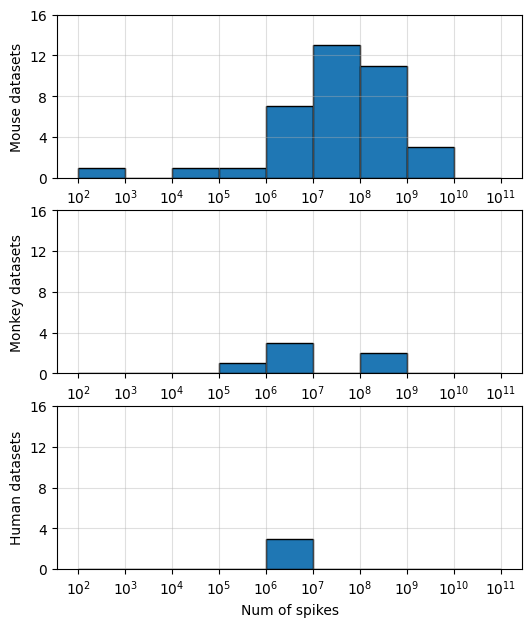

In [530]:
fig, ax = plt.subplots(len(subject_types), figsize=(6, 2.4*len(subject_types)))

for i, sub in enumerate(subject_types):
    
    spikes = []
    for j in range(len(data_list)):
        if sub == subjects[j]:
            spikes.append(data_list[j]['num_spikes']['total'])
    
    #units = [sum(x['units']['session_list']) for x in data_list]

    bins = np.logspace(2, 11, num=10)
    ax[i].hist(spikes, bins=list(bins), edgecolor='black')
    ax[i].set_xscale('log')
    ax[i].set_ylabel(f"{sub} datasets")
    ax[i].set_yticks(range(0, 18, 4))
    ax[i].set_xticks(bins)
    ax[i].grid(alpha=0.4)

ax[-1].set_xlabel("Num of spikes")

#### Number of trials per session

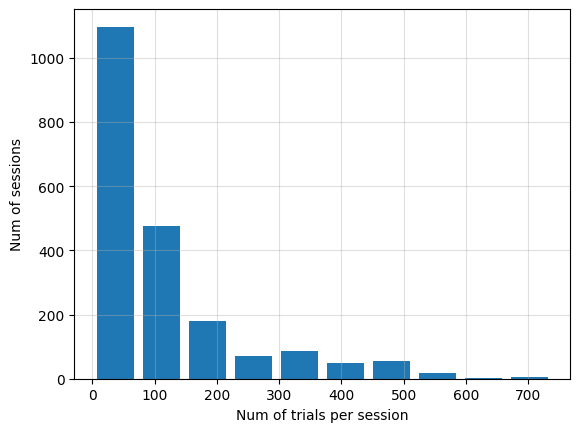

In [208]:
trials = []
for d in data_list:
    trials += d['trials']['session_list']

plt.hist(trials, rwidth=0.8)
plt.xlabel("Num of trials per session")
plt.ylabel("Num of sessions")
plt.grid(alpha=0.4)

#### SUS

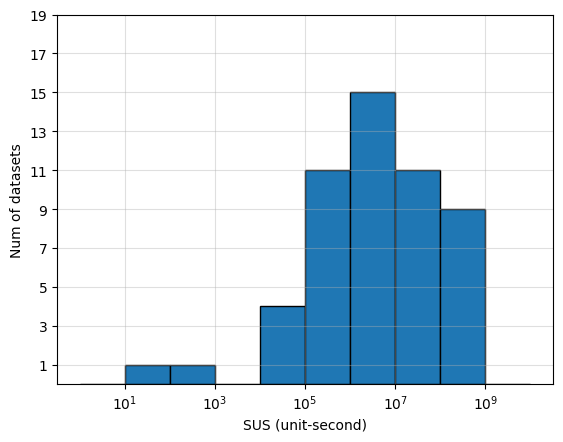

In [350]:
units = [x['sus']['session_total'] for x in data_list]

bins = np.logspace(0, 10, num=11)
plt.hist(units, bins=list(bins), edgecolor='black')
plt.xscale('log')
plt.xlabel("SUS (unit-second)")
plt.ylabel("Num of datasets")
plt.yticks(range(1, 20, 2))
plt.grid(alpha=0.4)

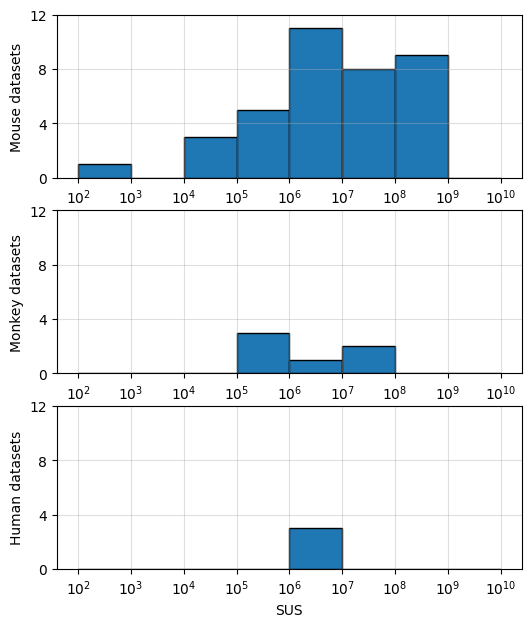

In [519]:
fig, ax = plt.subplots(len(subject_types), figsize=(6, 2.4*len(subject_types)))

for i, sub in enumerate(subject_types):
    
    sus = []
    for j in range(len(data_list)):
        if sub == subjects[j]:
            sus.append(data_list[j]['sus']['session_total'])
    
    #units = [sum(x['units']['session_list']) for x in data_list]

    bins = np.logspace(2, 10, num=9)
    ax[i].hist(sus, bins=list(bins), edgecolor='black')
    ax[i].set_xscale('log')
    ax[i].set_xlabel("SUS")
    ax[i].set_ylabel(f"{sub} datasets")
    ax[i].set_yticks(range(0, 13, 4))
    ax[i].set_xticks(bins)
    ax[i].grid(alpha=0.4)

#### Device

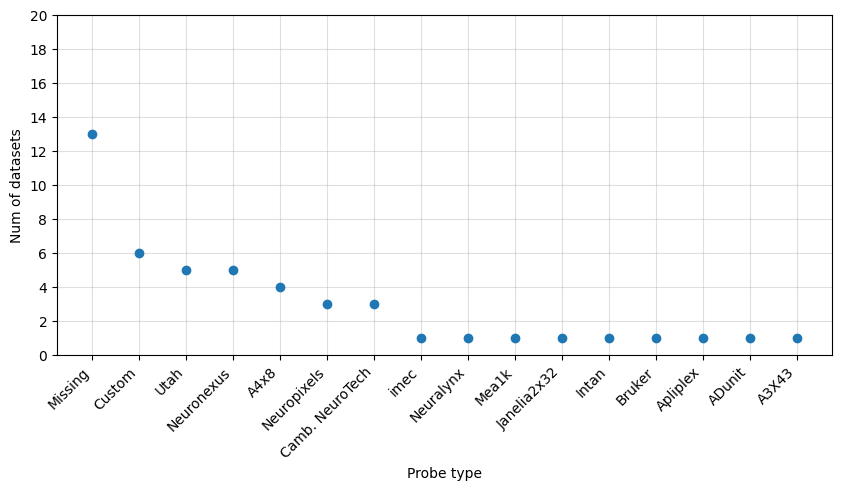

In [531]:
devices = []
with open('data/probes.txt', 'r') as f:
    for x in f.readlines():
        devices.append(x.strip())
    #devices = [x.strip() for x in f.readlines()]

s = list(set(devices))
counts = [0]*len(s)
for i in range(len(s)):
    counts[i] = sum([x == s[i] for x in devices])

s_sorted = [x for _,x in sorted(zip(counts, s))][::-1]
counts_sorted = sorted(counts)[::-1]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(s_sorted, counts_sorted, 'o')
ax.set_xlabel("Probe type")
ax.set_ylabel("Num of datasets")
ax.set_yticks(range(0, 22, 2))
ax.grid(alpha=0.4)
fig.autofmt_xdate(rotation=45)